<a href="https://colab.research.google.com/github/aleksejalex/expert-octo-eureka/blob/main/RADcv_Assignment_1_Gaj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RADcv - 1. zápočtová úloha
Aleksej Gaj
(vypracováno v Pythonu)

Zadání:

## Popis úlohy

V tomto úkolu je cílem provést předzpracování datového souboru, jeho vizualizaci a jednoduchou lineární regresní úlohu, kde se budeme zajímat o ceny nemovitostí. Za tímto účelem využijeme datový set *saratosa_hoouses* z knihovny *moderndive* obsahující výběr 1057 domů.

## načtení knihoven, definice flastních fcí

In [ ]:
# updating packages ... NOT NECESSARY
#!pip install pip --upgrade
!pip install numpy --upgrade
!pip install scipy --upgrade
!pip install sympy --upgrade
!pip install pandas --upgrade
#!pip install seaborn --upgrade
!pip install csv --upgrade
#!pip install pprint --upgrade
#!pip install matplotlib --upgrade
!pip install statsmodels --upgrade
#!pip install ipython --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 4.4 MB/s 
  Attempting uninstall: sympy
    Found existing installation: sympy 1.7.1
    Uninstalling sympy-1.7.1:
      Successfully uninstalled sympy-1.7.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 4.2 MB/s 
  Attempt

In [ ]:
#!python -m pip uninstall matplotlib
#!pip install matplotlib==3.1.3

In [112]:
# importy balicku
import inspect
import numpy as np
import pandas as pd
import seaborn as sbn
import csv
import matplotlib as mpt
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt


def retrieve_name(var):
    "vrati nazev promenne jako string"
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

examplevarr = 4
print(examplevarr)
print(retrieve_name(examplevarr))

def gauss(x, mi, sigma2):
    "hustota normalniho rozdeleni. x je bud cislo nebo np.array"
    return (1/(np.sqrt(2*np.pi*sigma2)) * np.exp (-  ( (x-mi)**2 ) / (2*sigma2) ) )


4
['examplevarr']


In [80]:
# additional settings for plotting images:
plt.rcParams.update({"figure.dpi": 130})   # increase DPI, default = 96
#%config InlineBackend.figure_format = "svg"  # every plot (matplotlib's or seaborn's) must be a SVG image

## nahrání datasetu
dataset snažen z https://r-data.pmagunia.com/dataset/r-dataset-package-mosaicdata-saratogahouses

Načten do notebooku pomocí kopie na GitHubu

In [3]:
# import datasetu (pomoci Pandas)
# (puvodne dataset byl stazen z >>  https://r-data.pmagunia.com/dataset/r-dataset-package-mosaicdata-saratogahouses  )
url = "https://raw.githubusercontent.com/aleksejalex/expert-octo-eureka/main/dataset_saratoga_houses_from_R.csv"
data = pd.read_csv(url)

data
#data.info

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3,hot air,gas,public/commercial,No,No,No
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7,hot air,gas,public/commercial,No,No,No


## popis dat:

A data frame with 1728 observations on the following 16 variables.

* `price` price (1000s of US dollars)

* `lotSize` size of lot (square feet)

* `age` age of house (years)

* `landValue` value of land (1000s of US dollars)

* `livingArea` living are (acres)

* `pctCollege` percent of neighborhood that graduated college

* `bedrooms` number of bedrooms

* `firplaces` number of fireplaces

* `bathrooms` number of bathrooms (half bathrooms have no shower or tub)

* `rooms` number of rooms

* `heating` type of heating system

* `fuel` fuel used for heating

* `sewer` type of sewer system

* `waterfront` whether property includes waterfront

* `newConstruction` whether the property is a new construction

* `centralAir` whether the house has central air

Převzato z >>>   https://r-data.pmagunia.com/dataset/r-dataset-package-mosaicdata-saratogahouses

## Otázka 01

Zjistěte, zdali data neobsahují chybějící hodnoty *NA*. Pokud ano, tak rozhodněte zdali můžete příslušná pozorování z dat odstranit a proč. Které proměnné jsou kvantitativní a které kvalitativní? Jeli možno některé zařadit do obou skupin, pro kterou byste se rozhodli? Které proměnné je možné pužít jako faktorové ordinální a jaké jako faktorové nominální a proč? Spočtěte základní statistiky pro jednotlivé proměnné.

In [4]:
nan_in_data = data.isnull().sum().sum()
print('Number of NaN values in dataframe: ' + str(nan_in_data))

Number of NaN values in dataframe: 0


In [5]:
# totez lze videt z 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB
N


Kvalitativní proměnné: \\
`heating` \\
`fuel` \\
`sewer` \\
`waterfront` \\
`newConstruction` \\
`centralAir` \\

Kvantitativní proměnné: \\
`price` \\
`lotSize` \\
`age` \\
`landValue` \\
`livingArea` \\
`pctCollege` \\

"Obojetné" proměnné: \\
`bedrooms` \\
`fireplaces` \\
`bathrooms` \\
`rooms` \\








### Základní statistiky

In [6]:
#print(data.describe())
data.describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


## Otázka 02

Chceme koupit nemovitost v zahraničí a průzkumem trhu jsme obdřeli předchozí data set *saratoga_houses*. Jelikož ale máme přesnější požadavky a nerozumíme imperiálním jednotkám, potřebujeme data upravit:

* Převeďte cenu nemovitostí z dolarů na koruny v tisících a plochu pozemku a obytnou plochu z akrů a čtverečích stop na $m^2$. (chceck describtion by *? saratoga_houses*) 
* Vyberte jen nemovitosti starší 10 let a mladší 50 let, jejichž cena je menší než 7500000 Kč, a plocha pozemku je mezi 500 a 5000 $m^2$.
* Počet koupelen a počet pokojů převeďte na faktorové proměnné o 3 úrovních.

**Dále pracujte jen s takto omezeným datasetem a s proměnnýma *cena*, *plocha_obytna*, *plocha_pozemku* *pocet_pokoju*,*stari_domu*, *pocet_koupelen*, *krb*.**

### "Přeložení" dat do nového dataframu `data_cz` 

In [7]:
data_cz = pd.DataFrame()
data_cz['cena'] = data.price * 24.96     # kurz k 20221019, ceny byly v tisicich uz v USD
data_cz['plocha_pozemku'] = data.lotSize * 4046.86  # acres to m2
data_cz['plocha_obytna'] = data.livingArea * 0.09290304  # square ft to m2
data_cz['pocet_pokoju'] = data.bedrooms
data_cz['stari_domu'] = data.age
data_cz['pocet_koupelen'] = data.bathrooms
data_cz['pocet_loznic'] = data.bedrooms
data_cz['krb'] = data.fireplaces

data_cz

,cena,plocha_pozemku,plocha_obytna,pocet_pokoju,stari_domu,pocet_koupelen,pocet_loznic,krb
0,3307200.0,364.2174,84.170154,2,42,1.0,2,1
1,4520630.4,3723.1112,181.439637,3,0,2.5,3,0
2,2720640.0,768.9034,180.603510,4,133,1.0,4,1
3,3868800.0,1659.2126,180.603510,3,13,1.5,3,1
4,2148057.6,445.1546,78.038554,2,0,1.0,2,0
...,...,...,...,...,...,...,...,...
1723,7213440.0,1537.8068,214.606022,5,32,2.5,5,1
1724,7113600.0,3804.0484,238.203395,4,37,2.5,4,1
1725,4864704.0,1578.2754,102.100441,2,9,1.0,2,0
1726,3120000.0,971.2464,113.806224,3,48,1.0,3,1


### Kopírování dat do nového dataframu `data_cz_factorization` pro následnou faktorizaci některých proměnných

In [8]:
data_cz_factorization = pd.DataFrame()
data_cz_factorization['cena'] = data_cz.cena
data_cz_factorization['plocha_pozemku'] = data_cz.plocha_pozemku
data_cz_factorization['plocha_obytna'] = data_cz.plocha_obytna
data_cz_factorization['stari_domu'] = data_cz.stari_domu
data_cz_factorization['krb'] = data_cz.krb

In [9]:
data_cz_factorization['pocet_koupelen'] = data_cz.pocet_koupelen
data_cz_factorization['pocet_pokoju'] = data_cz.pocet_pokoju
data_cz_factorization['pocet_loznic'] = data_cz.pocet_loznic

### faktorizace poctu koupelen (3 urovne)

In [10]:
# faktorizace poctu koupelen - do 3 kategorii
# kriterium: interval od nejmensiho poctu do nejvetsiho rozdelen na 3 ekvidistantni intervaly
#            nasledne cislo je prirazeno na zaklade toho, do ktereho intervalu dana nemovitost spadla

pomocna_df = pd.DataFrame(pd.Categorical(np.asarray(list(pd.cut(data_cz['pocet_koupelen'], bins = 3)))))
#radek vyse:
#   1. rozdeli pocet_koupelen na intervalky, vrati promennou categorical
#   2. ulozim jako list
#   3. ulozim jako np.array
#   4. udelam z toho categorical promennou (ne, rovnou pouzit vystup fce pd.cut z nejakeho duvodu neslo)
#   5. udelam z toho pd.dataframe
pomocna_df.columns = ['intervalky']
#   6. pojmenuji sloupec, abych k nemu mohl mit pristup
data_cz_factorization['pocet_koupelen_faktor'] = pomocna_df['intervalky']
#   7. vysledek vlozim do hlavniho dataframu
data_cz_factorization['pocet_koupelen_faktor'] = data_cz_factorization['pocet_koupelen_faktor'].apply(lambda x: pd.factorize(x)[0])
#   8. provedu faktorizaci, tzn kazdemu prvku, ktery potka poprve, priradi int o jedna vetsi nez predchozimu
data_cz_factorization.pocet_koupelen_faktor = pd.to_numeric(data_cz_factorization.pocet_koupelen_faktor, errors='coerce')
#   9. cisla, ziskana faktorizaci v bodu 8. jsou int, ale maji typ pd.categorical, takze konvertuji je na integery
print(data_cz_factorization)
#   10. podivam se na vysledek (pro jistotu)
del(pomocna_df)
#   11. smazu nepotrebnou promennou pro pripad pozdejsiho pouziti stejneho nazvu...

           cena  plocha_pozemku  plocha_obytna  stari_domu  krb  \
0     3307200.0        364.2174      84.170154          42    1   
1     4520630.4       3723.1112     181.439637           0    0   
2     2720640.0        768.9034     180.603510         133    1   
3     3868800.0       1659.2126     180.603510          13    1   
4     2148057.6        445.1546      78.038554           0    0   
...         ...             ...            ...         ...  ...   
1723  7213440.0       1537.8068     214.606022          32    1   
1724  7113600.0       3804.0484     238.203395          37    1   
1725  4864704.0       1578.2754     102.100441           9    0   
1726  3120000.0        971.2464     113.806224          48    1   
1727  2778048.0       2387.6474     181.997055          86    0   

      pocet_koupelen  pocet_pokoju  pocet_loznic  pocet_koupelen_faktor  
0                1.0             2             2                      0  
1                2.5             3             

### faktorizace poctu pokoju (3 urovne)

In [11]:
# faktorizace poctu pokoju - do 3 kategorii
# POZOR - vse je naprosto stejne, jako v pri faktorizaci poctu koupelen - viz vyse (proto jiz bez komentaru)

pomocna_df = pd.DataFrame(pd.Categorical(np.asarray(list(pd.cut(data_cz['pocet_pokoju'], bins = 3)))))
#radek vyse:
#   1. rozdeli pocet_pokoju na intervalky, vrati promennou categorical
#   2. ulozim jako list
#   3. ulozim jako np.array
#   4. udelam z toho categorical promennou (ne, rovnou pouzit vystup fce pd.cut z nejakeho duvodu neslo)
#   5. udelam z toho pd.dataframe
pomocna_df.columns = ['intervalky']
#   6. pojmenuji sloupec, abych k nemu mohl mit pristup
data_cz_factorization['pocet_pokoju_faktor'] = pomocna_df['intervalky']
#   7. vysledek vlozim do hlavniho dataframu
data_cz_factorization['pocet_pokoju_faktor'] = data_cz_factorization['pocet_pokoju_faktor'].apply(lambda x: pd.factorize(x)[0])
#   8. provedu faktorizaci, tzn kazdemu prvku, ktery potka poprve, priradi int o jedna vetsi nez predchozimu
data_cz_factorization.pocet_pokoju_faktor = pd.to_numeric(data_cz_factorization.pocet_pokoju_faktor, errors='coerce')
#   9. cisla, ziskana faktorizaci v bodu 8. jsou int, ale maji typ pd.categorical, takze konvertuji je na integery
print(data_cz_factorization)
#   10. podivam se na vysledek (pro jistotu)
del(pomocna_df)
#   11. smazu nepotrebnou promennou pro pripad pozdejsiho pouziti stejneho nazvu...

           cena  plocha_pozemku  plocha_obytna  stari_domu  krb  \
0     3307200.0        364.2174      84.170154          42    1   
1     4520630.4       3723.1112     181.439637           0    0   
2     2720640.0        768.9034     180.603510         133    1   
3     3868800.0       1659.2126     180.603510          13    1   
4     2148057.6        445.1546      78.038554           0    0   
...         ...             ...            ...         ...  ...   
1723  7213440.0       1537.8068     214.606022          32    1   
1724  7113600.0       3804.0484     238.203395          37    1   
1725  4864704.0       1578.2754     102.100441           9    0   
1726  3120000.0        971.2464     113.806224          48    1   
1727  2778048.0       2387.6474     181.997055          86    0   

      pocet_koupelen  pocet_pokoju  pocet_loznic  pocet_koupelen_faktor  \
0                1.0             2             2                      0   
1                2.5             3           

### Zkopírování dat do nového dataframu `data_cz_cut` a následné oříznutí dat dle zadání

In [12]:
data_cz_cut = pd.DataFrame()
data_cz_cut['cena'] = data_cz_factorization.cena
data_cz_cut['plocha_pozemku'] = data_cz_factorization.plocha_pozemku
data_cz_cut['plocha_obytna'] = data_cz_factorization.plocha_obytna
data_cz_cut['stari_domu'] = data_cz_factorization.stari_domu
data_cz_cut['krb'] = data_cz_factorization.krb
data_cz_cut['pocet_pokoju'] = data_cz_factorization.pocet_pokoju
data_cz_cut['pocet_koupelen'] = data_cz_factorization.pocet_koupelen
data_cz_cut['pocet_loznic'] = data_cz.pocet_loznic
data_cz_cut['pocet_pokoju_faktor'] = data_cz_factorization.pocet_pokoju_faktor
data_cz_cut['pocet_koupelen_faktor'] = data_cz_factorization.pocet_koupelen_faktor

In [13]:
data_cz_cut = data_cz_cut[data_cz_cut['stari_domu']>10]
data_cz_cut = data_cz_cut[data_cz_cut['stari_domu']<50]

data_cz_cut = data_cz_cut[data_cz_cut['cena']<7500000]
data_cz_cut = data_cz_cut[data_cz_cut['plocha_pozemku']<5000]
data_cz_cut = data_cz_cut[data_cz_cut['plocha_pozemku']>50]

Jak vypadají oříznutá data:

In [14]:
# volba dat, se kterymi dal budeme pracovat. lze dle potreby zamenit za:
#   data ... importovany dataset
#   data_cz ... pouze koverze, ale bez faktorizace koupelen a pokoju
#   data_cz_factorization ... totez co data_cz ale s faktorizaci
#   data_cz_cut ... totez co data_cz_factorization, ale jen  
#                      starsi 10 let a mladší 50 let, 
#                      jejichž cena je menší než 7500000 Kč, a plocha pozemku je mezi 500 a 5000  m2
curr_data = data_cz_cut
curr_data

curr_data.head()


,cena,plocha_pozemku,plocha_obytna,stari_domu,krb,pocet_pokoju,pocet_koupelen,pocet_loznic,pocet_pokoju_faktor,pocet_koupelen_faktor
0,3307200.0,364.2174,84.170154,42,1,2,1.0,2,0,0
3,3868800.0,1659.2126,180.603510,13,1,3,1.5,3,0,0
5,2995200.0,2751.8648,107.024302,31,1,4,1.0,4,1,0
6,3818880.0,1618.7440,255.669166,33,1,4,1.5,4,1,0
7,4243200.0,4896.7006,154.404852,23,1,4,1.5,4,1,0


In [15]:
curr_data.describe()

,cena,plocha_pozemku,plocha_obytna,stari_domu,krb,pocet_pokoju,pocet_koupelen,pocet_loznic,pocet_pokoju_faktor,pocet_koupelen_faktor
count,1.015000e+03,1015.00000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,4.430829e+06,1546.61819,148.178152,24.066995,0.594089,3.054187,1.762562,3.054187,0.260099,0.428571
std,1.307082e+06,1000.96111,44.262713,9.280074,0.524324,0.800653,0.572872,0.800653,0.445594,0.520366
min,2.570880e+05,80.93720,59.457946,11.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,3.469440e+06,647.49760,117.893958,17.000000,0.000000,3.000000,1.500000,3.000000,0.000000,0.000000
50%,4.318080e+06,1416.40100,142.141651,20.000000,1.000000,3.000000,1.500000,3.000000,0.000000,0.000000
75%,5.353920e+06,2023.43000,174.332555,32.000000,1.000000,4.000000,2.500000,4.000000,1.000000,1.000000
max,7.488000e+06,4896.70060,334.822556,49.000000,2.000000,7.000000,3.500000,7.000000,2.000000,2.000000


## Otázka 03 

* Porovnejte průměry cen nemovitostí s krbem a bez krbu a otestujte, zdali na hladině významnosti $\alpha = 0.01$ je průměrná cena nemovitostí s krbem větší než průměrná cena nemovitostí bez krbu.

In [16]:
# pouziji na to Studentuv t-test:
# H_0: stredni hodnoty vzorku jsou shodne 
# H_1: stredni hodnoty vzorku jsou ruzne

from scipy.stats import ttest_ind
data1 = curr_data[curr_data["krb"] == 0].cena
data2 = curr_data[curr_data["krb"] != 0].cena
stat, p = ttest_ind (data1, data2)
print(p)
if p > 0.01:
    print("probably same distribution")
else:
    print("probably diferent distributions")


2.8330048790183065e-27
probably diferent distributions


In [17]:
print(np.mean(data1))
print(np.mean(data2))

3926373.0036363634
4800132.778156997


# Vizualizace dat

## Otázka 04 

* Vykreslete scatterploty pro všechny numerické proměnné, kde bude barevně rozlišeno, zdali se jedná o nemovitost s krbem, nebo bez krbu.
*  Pro proměnné *pocet_pokoju* a *pocet_koupelen* a *krb* vykreslete krabicové diagramy (nebo violin ploty), kde odezvou bude *cena*.
* Pro proměnnou *cena* vykreslete histogram spolu s jádrovým odhadem hustoty.


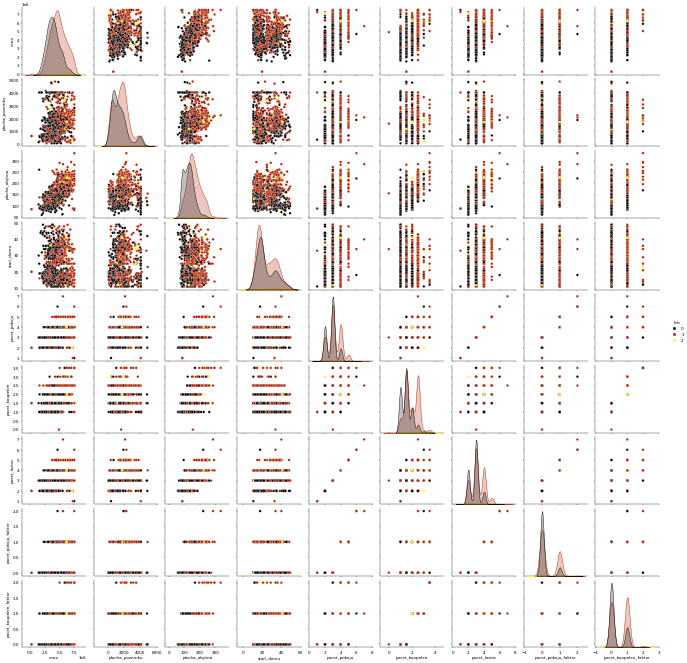

In [18]:
# MIMO zadani: pair plot pro prvnotni predstavu o datasetu
sbn.pairplot(curr_data, hue='krb', palette='gnuplot')  # podle POCTU KRBU

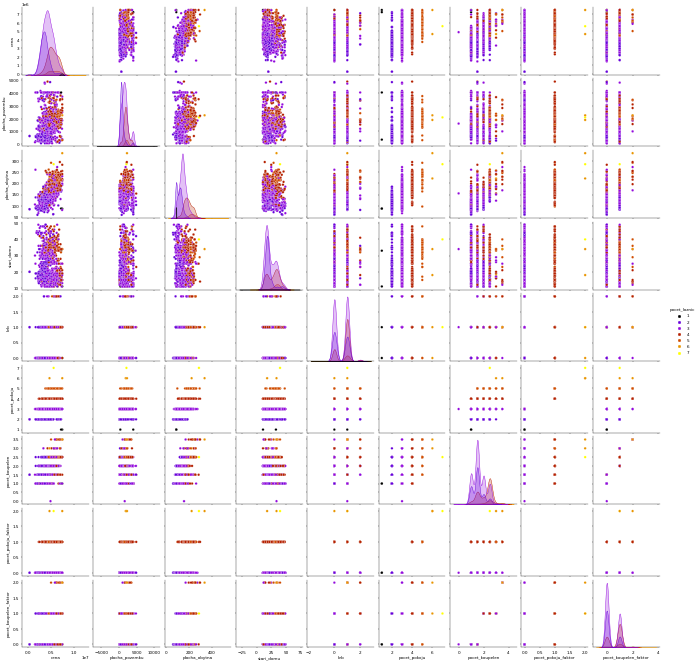

In [19]:
# MIMO zadani: pair plot pro prvnotni predstavu o datasetu
sbn.pairplot(curr_data, hue='pocet_loznic', palette='gnuplot')  # podle POCTU LOZNIC

Column Name :  plocha_pozemku


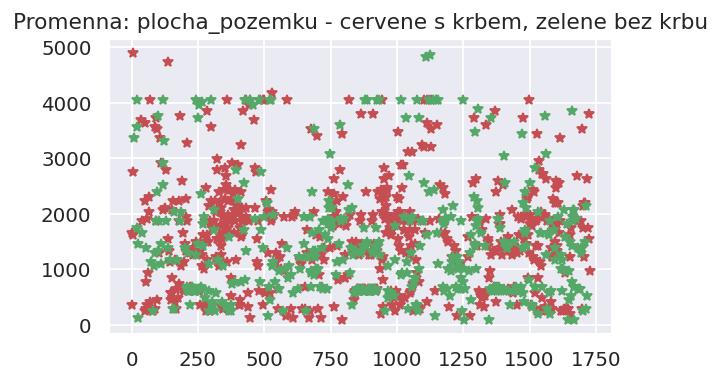

Column Name :  cena


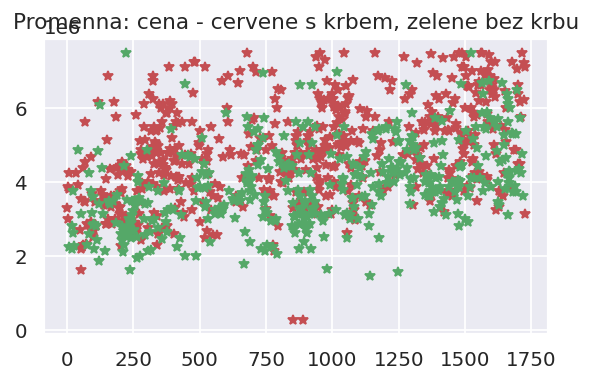

Column Name :  plocha_obytna


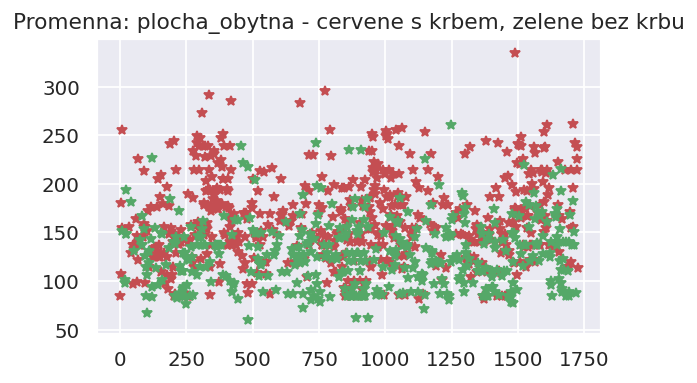

Column Name :  stari_domu


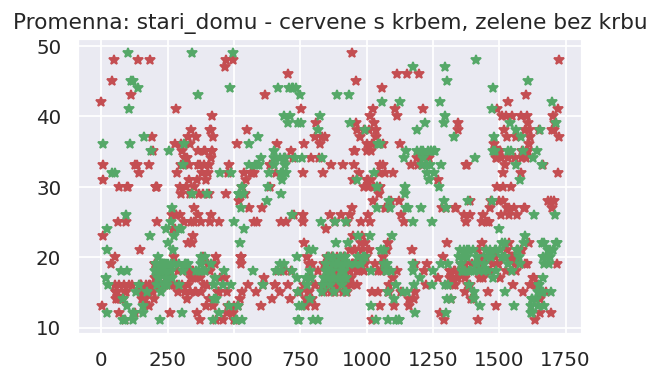

In [123]:
# tj. pro kazdou numerickou promennou jeden scatterplot se dvemi ploty: zelene bez krbu, cervene s krbem
# jelikoz nevim predem, kolik presne chci obrazku, musi byt 'pod sebou', nepouziji subplots

data_cz_s_krbem = curr_data[ (curr_data['krb']) != 0 ]   # vsechny info o vsech nemovitostech S KRBEM (jeden krb nebo i vice krbu)
data_cz_bez_krbu = curr_data[ (curr_data['krb']) == 0 ]   # vsechny info o vsech nemovitostech BEZ KRBU

#for column in data_cz:
for column in {'cena', 'plocha_pozemku', 'plocha_obytna', 'stari_domu'}: 
    # nema smysl vykreslovat pro kvalitativni promenne, ale lze (staci pouzit 'for' o radek vyse)
    columnSeriesObj = data_cz[column]
    print('Column Name : ', column)
    num_s_krbem = data_cz_s_krbem.loc[:, column]
    num_bez_krbu = data_cz_bez_krbu.loc[:, column]
    plt.figure(figsize=(5,3))
    plt.plot(num_s_krbem, 'r*')
    plt.plot(num_bez_krbu, 'g*')
    plt.title("Promenna: " + str(column) + " - cervene s krbem, zelene bez krbu")
    plt.show()

Zvláštní: zdá se, že staré domy spíš krb nemají, než mají.

### violin ploty a boxploty pro cenu 

Poznámka: počet ložnic a počet krbů nebyl faktorizován, narozdíl od počtu pokojů a počtu koupelen.

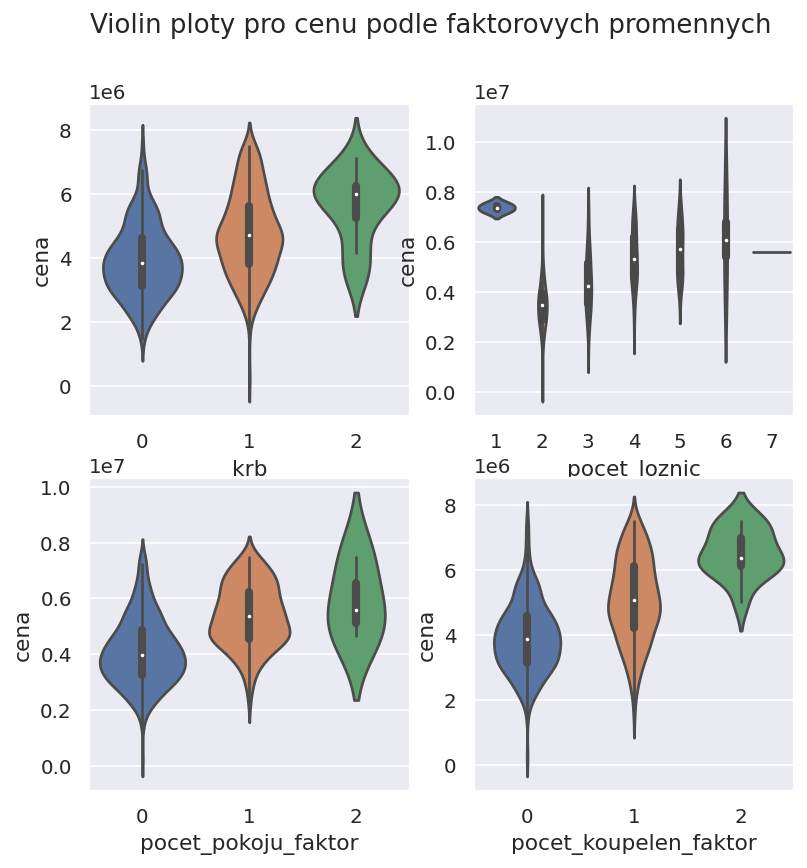

In [119]:
#plt.figure(figsize=(8,6))
fig, axs = plt.subplots(2, 2, figsize =(7, 7))
sbn.violinplot( x = curr_data["krb"], y = curr_data["cena"], ax = axs[0,0])
sbn.violinplot( x = curr_data["pocet_loznic"], y = curr_data["cena"], ax = axs[0,1])
sbn.violinplot( x = curr_data["pocet_pokoju_faktor"], y = curr_data["cena"] , ax = axs[1,0])
sbn.violinplot( x = curr_data["pocet_koupelen_faktor"], y = curr_data["cena"] , ax = axs[1,1])

fig.suptitle("Violin ploty pro cenu podle faktorovych promennych")
fig.show()

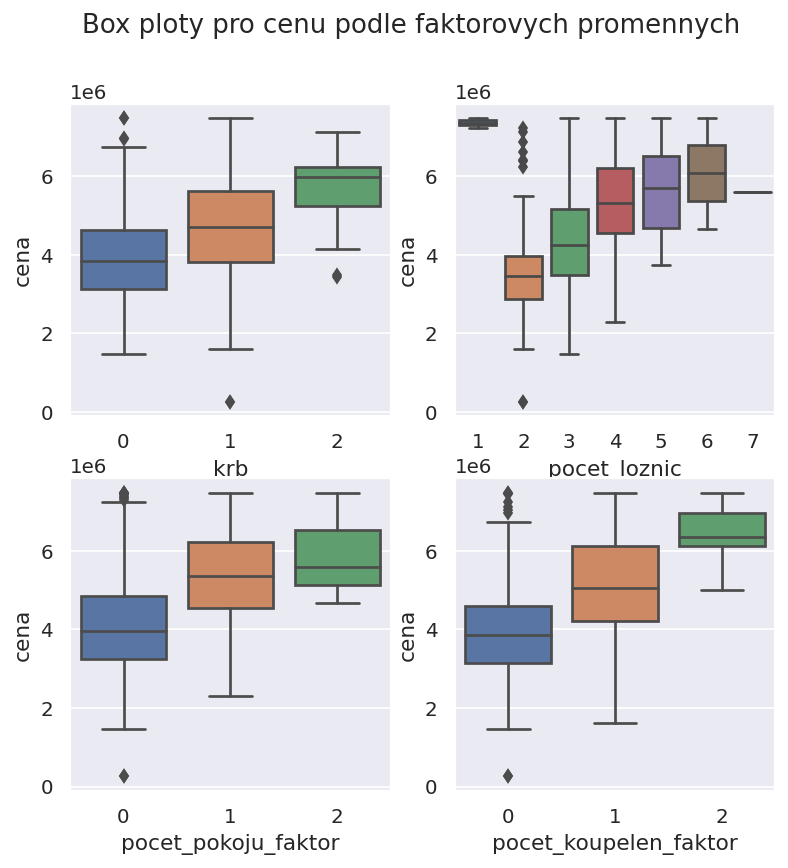

In [118]:
# boxploty (na stejnych datech jako violin ploty vyse)
fig, axs = plt.subplots(2, 2, figsize =(7, 7))
sbn.boxplot( x = curr_data["krb"], y = curr_data["cena"], ax = axs[0,0])
sbn.boxplot( x = curr_data["pocet_loznic"], y = curr_data["cena"], ax = axs[0,1])
sbn.boxplot( x = curr_data["pocet_pokoju_faktor"], y = curr_data["cena"] , ax = axs[1,0])
sbn.boxplot( x = curr_data["pocet_koupelen_faktor"], y = curr_data["cena"] , ax = axs[1,1])

fig.suptitle("Box ploty pro cenu podle faktorovych promennych")
fig.show()

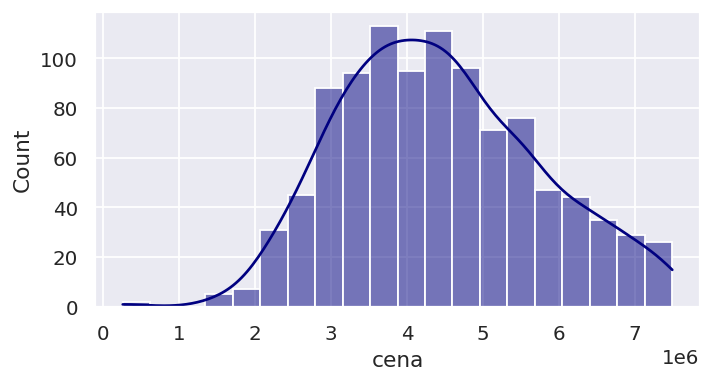

In [115]:
# pro promennou cena - histogram s jadrovym odhadem hustoty
#sns.histplot(data = score_data,x = 'score',color = 'navy',kde = True)
# (inspired by >> https://www.sharpsightlabs.com/blog/seaborn-histogram/ )

sbn.set(rc={"figure.figsize":(6, 3)}) #width=6, height=5
sbn.histplot(data = curr_data.cena, color = 'navy', kde = True)  # Gaussian kernel by default


## Otázka 05

Pro kombinace faktorizovaných proměnných *pocet_pokoju*, *pocet_koupelen*  vykreslete cenu nemovitosti, aby bylo na obrázku vidět, jestli se v průměru liší ceny nemovitostí majících více pokojů, nebo více koupelen a zdali jsou zastoupeny všechny kombiance všech úrovních pro dvě zmíněné faktorové proměnné.

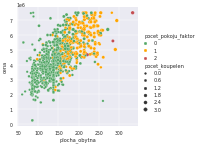

In [24]:
#plt.figure(figsize=(8,6))
#sbn.boxplot( y = 'cena' , data = curr_data)
#sbn.boxplot( y = 'cena' , data = curr_data , hue = 'pocet_koupelen_faktor')

# ###################3 TO DO ##########################################################################################

sbn.relplot(data = curr_data, x='plocha_obytna', y = 'cena', hue = "pocet_pokoju_faktor", size="pocet_koupelen", palette=["g", "orange" , "r"])

plt.show()

## Otázka 06

Pro nemovitosti s dvěma ložnicema vykreslete závislost ceny na obytné ploše nemovitosti, kde jednotlivé události označíte barvou podle toho zdali mají krb a velikost bodů v grafu bude odpovídat počtu koupelen (pro tuto úlohu je lepší vzít počet koupelen jako numerickou proměnnou).

**Dále pracujte jen s nemovitostmi se dvěma ložnicemi.**

In [25]:
# vyriznuti jen nemovitosti se dvema loznicemi
data_2_bedrooms = curr_data[curr_data['pocet_loznic']==2]
data_2_bedrooms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 1717
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cena                   245 non-null    float64
 1   plocha_pozemku         245 non-null    float64
 2   plocha_obytna          245 non-null    float64
 3   stari_domu             245 non-null    int64  
 4   krb                    245 non-null    int64  
 5   pocet_pokoju           245 non-null    int64  
 6   pocet_koupelen         245 non-null    float64
 7   pocet_loznic           245 non-null    int64  
 8   pocet_pokoju_faktor    245 non-null    int64  
 9   pocet_koupelen_faktor  245 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 21.1 KB


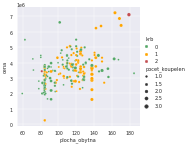

In [26]:
#sns.relplot( data=tips, x="total_bill", y="tip", col="time",  hue="time", size="size", style="sex", palette=["b", "r"], sizes=(10, 100) )

#plt.figure(figsize=(11,7))
sbn.relplot(data = data_2_bedrooms, x='plocha_obytna', y = 'cena', hue = "krb", size="pocet_koupelen", palette=["g", "orange" , "r"])


# Jednoduchý lineární model

## Otázka 07

Sestavte jednoduchý regresní model (s i bez interceptu), kde vysvětlovaná proměnná
bude cena nemovitosti a vysvětlující obytná plocha.   Spočtěte pro oba modely $R^2$ a $F$ statistiky, co nám o modelech říkají. Vyberte jeden z nich a zdůvodněte proč ho preferujete.

Na základě zvoleného modelu odpovězte, zdali cena nemovitosti závisí na obytné ploše  a pokud ano, o kolik se změní očekávaná cena pro nemovitost s obytnou plochou zvětšenou o $20 m^2$? 

In [27]:
import statsmodels.formula.api as sm

In [28]:
# S INTERCEPTEM
model_s_inter = sm.ols(formula = "cena ~ plocha_obytna", data = data_2_bedrooms)
results_s_inter = model_s_inter.fit()

print(results_s_inter.summary())
#results_s_inter.summary()
#del(model)
#del(result)

                            OLS Regression Results                            
Dep. Variable:                   cena   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     44.36
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           1.81e-10
Time:                        21:00:12   Log-Likelihood:                -3707.8
No. Observations:                 245   AIC:                             7420.
Df Residuals:                     243   BIC:                             7427.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.765e+06   2.69e+05      6.568

In [29]:
results_s_inter.params

Intercept        1.765058e+06
plocha_obytna    1.586509e+04
dtype: float64

In [30]:
# BEZ INTERCEPTU
model_bez_inter = sm.ols(formula = "cena ~ plocha_obytna - 1", data = data_2_bedrooms)
results_bez_inter = model_bez_inter.fit()

print(results_bez_inter.summary())
#results_bez_inter.summary()
#del(model)
#del(result)

                                 OLS Regression Results                                
Dep. Variable:                   cena   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              3126.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):                   4.05e-141
Time:                        21:00:25   Log-Likelihood:                         -3727.9
No. Observations:                 245   AIC:                                      7458.
Df Residuals:                     244   BIC:                                      7461.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [31]:
results_bez_inter.params

plocha_obytna    31142.198179
dtype: float64

### Co jsou $R^2$ a $F$ a kterou upřednostnit?

$R^2$ 
zjednodušeně udává, kolik procent pozorování $y$ může být vysvětleno pomocí $x$
(čím větší je $R^2$, resp. čím bližší k 1, tím lepší máme model)


$F$
(goodness of fit)

 vypočtena z $R^2$, počtu dat $n$ a počtu stupňů volnosti $k$ následně:
\begin{equation}
F = \frac{R^2 / (k-1)}{(1 - R^2) / (n - k)}
\end{equation}



**Q:** Na základě zvoleného modelu odpovězte, zdali cena nemovitosti závisí na obytné ploše  a pokud ano, o kolik se změní očekávaná cena pro nemovitost s obytnou plochou zvětšenou o $20 m^2$?  


**A:** podle tabulky výše ano: statistiky zmíněné výše mají hodnoty, které odpovídají situaci, kdy model popisuje data dost přesně.        





## Otázka 08
Sestavte jednoduchý linární model jako v předchozí otázce pro nemovitosti s krbem a bez krbu. Jaký model vykazuje silnější linearní vztah mezi cenou a obytnou plochou? O kolik cena s rostoucí obytnou plochou pro nemovitosti s krbem roste rychleji než pro nemovitosti bez krbu?

Spočtěte 95% konfidenční intervaly pro regresní koeficienty popisující sklon regresní přímky v obou modelech a zjistěte, zdali se protínají. Co z toho můžeme vyvozovat?

Na základě těchto modelů zjistěte o kolik procent bude mít průměrná nemovitost s krbem a obytnou plochou $160m^2$ vyšší očekávanou cenu než průměrná nemovitost o stejné obytné ploše, ale bez krbu.

In [32]:
#data_s_krbem = curr_data[curr_data['krb'] != 0]
#data_bez_krbu = curr_data[curr_data['krb'] == 0]
data_s_krbem = data_2_bedrooms[data_2_bedrooms['krb'] != 0]
data_bez_krbu = data_2_bedrooms[data_2_bedrooms['krb'] == 0]

In [33]:
model_s_krbem = sm.ols(formula = "cena ~ plocha_obytna -1", data = data_s_krbem)
results_s_krbem = model_s_krbem.fit()
model_bez_krbu = sm.ols(formula = "cena ~ plocha_obytna -1", data = data_bez_krbu)
results_bez_krbu = model_bez_krbu.fit()

print("s krbem >> \n")
print(results_s_krbem.summary())

print("\n\n\n")

print("bez krbu >> \n")
print(results_bez_krbu.summary())


s krbem >> 

                                 OLS Regression Results                                
Dep. Variable:                   cena   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              1765.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):                    2.12e-70
Time:                        21:00:31   Log-Likelihood:                         -1712.9
No. Observations:                 113   AIC:                                      3428.
Df Residuals:                     112   BIC:                                      3431.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

**Q:**  Jaký model vykazuje silnější linearní vztah mezi cenou a obytnou plochou?

**A:** model s krbem má značně vyšší $R^2$ statistiku, a tedy lépe odpovídá datům než model bez krbu (je vidět přímo z tabulek výsledků výše).

**Q:** O kolik cena s rostoucí obytnou plochou pro nemovitosti s krbem roste rychleji než pro nemovitosti bez krbu?

**A:** sklon regresní přímky je určen koeficientem, v tomto případě rozdíl koeficientu pro model s krbem a pro model bez krbu je:


In [34]:
rozdil_koeficientu_beta_1 = np.abs(results_s_krbem.params["plocha_obytna"] - results_bez_krbu.params["plocha_obytna"])
print(rozdil_koeficientu_beta_1)

329.46133261786235


tj. o tolik Kč vzrůstá cena nemovitosti když se obytná plocha změní o $1 m^2$. 

**Q:** Na základě těchto modelů zjistěte o kolik procent bude mít průměrná nemovitost s krbem a obytnou plochou $160m^2$ vyšší očekávanou cenu než průměrná nemovitost o stejné obytné ploše, ale bez krbu.


**A:**    

## Otázka 09

Vykreslete scatterplot obytné plochy a ceny nemovitostí. Do tohoto grafu vykreslete regresní přímky vybraných modelů pro nemovitosti s krbem a bez něho, jednoltivé body i regresní přímky označte barvou podle toho k jaké skupině přísluší.

Sestrojte 90% konfidenční intervaly okolo očekávaných cen pro jednoltivé skupiny a na jejich základě rozhodněte, zdali a jak se očekávané ceny budou lišit pro nemovitosti s obytnou plochou menší než $120m^2$. Je to porovnávání správné? Zdůvoněte.

In [35]:
def primka(a, b, x):
    y = a*x + b
    return y

#x = np.arange(-10,10+1)
#print(x)
#plt.plot(x, primka(1,2,x))
#plt.show()

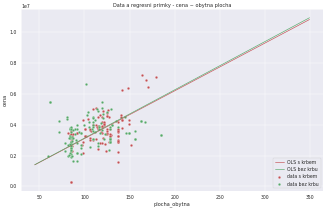

In [36]:
#plt.figure(figsize=(8,6))

fig = sbn.scatterplot(data = data_s_krbem, x="plocha_obytna", y = "cena", color="r", label="data s krbem")
fig.set_title("Data a regresni primky - cena ~ obytna plocha")
fig = sbn.scatterplot(data = data_bez_krbu, x="plocha_obytna", y = "cena", color="g", label="data bez krbu")
x = np.arange(45,350)
#fig = plt.plot(x, primka(results_s_krbem.params.plocha_obytna, results_s_krbem.params.Intercept, x), 'r', label="OLS s krbem")
#fig = plt.plot(x, primka(results_bez_krbu.params.plocha_obytna, results_bez_krbu.params.Intercept, x), 'g', label="OLS bez krbu")

fig = plt.plot(x, primka(results_s_krbem.params.plocha_obytna, 0, x), 'r', label="OLS s krbem")
fig = plt.plot(x, primka(results_bez_krbu.params.plocha_obytna, 0, x), 'g', label="OLS bez krbu")



plt.legend(loc="lower right")
plt.show()

**Q:** Sestrojte 90% konfidenční intervaly okolo očekávaných cen pro jednoltivé skupiny a na jejich základě rozhodněte, zdali a jak se očekávané ceny budou lišit pro nemovitosti s obytnou plochou menší než $120m^2$. Je to porovnávání správné? Zdůvoněte.


**A:**  



## Otázka 10

Vykreslete histogramy pro rezidua modelů z předchozí otázky. Proložte je hustotou normálního rozdělení s nulovou střední hodnotou a rozptylem odpovídajícím $\hat{\sigma}^2$ z jednotlivých modelů.

Co výsledný graf říka o n našich modelech a je toto ověření dostatečné pro validaci model?

Navrněte další úpravy modelu za cílem co nejlépe predikvoat cenu nemovitosti.

In [47]:
# ziskam residua z modelu vyse ve forme, vhodne pro kresleni histogramu
resid_s_krbem = results_s_krbem.resid.to_numpy()
resid_bez_krbu = results_bez_krbu.resid.to_numpy()

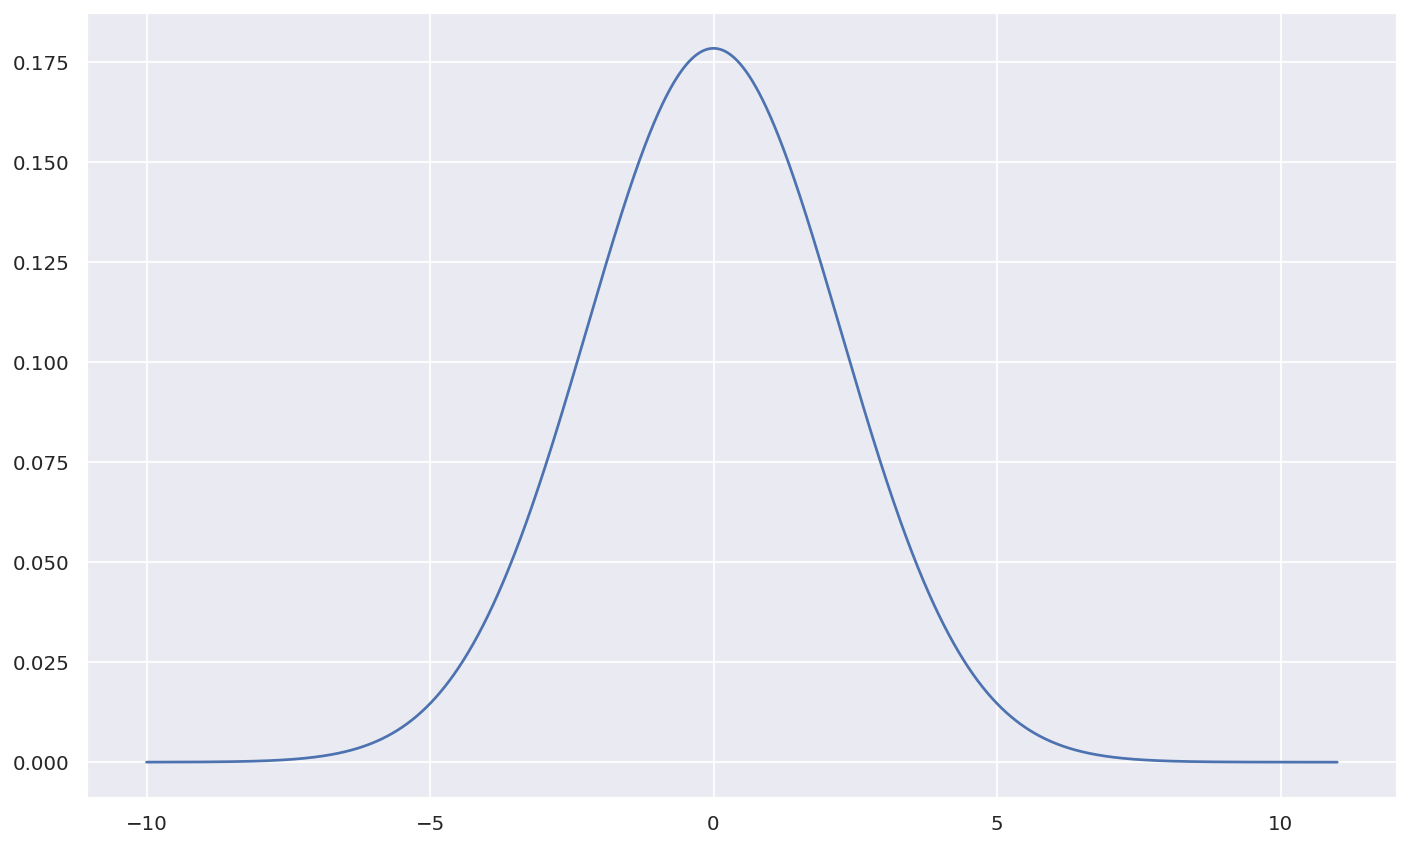

In [91]:
# naucim se kreslit hustotu normalniho rozdeleni
def gauss(x, mi, sigma2):
    return (1/(np.sqrt(2*np.pi*sigma2)) * np.exp (-  ( (x-mi)**2 ) / (2*sigma2) ) )

x = np.linspace(-10, 10+1, 10000)
plt.plot(x,gauss(x=x, sigma2=5, mi=0))

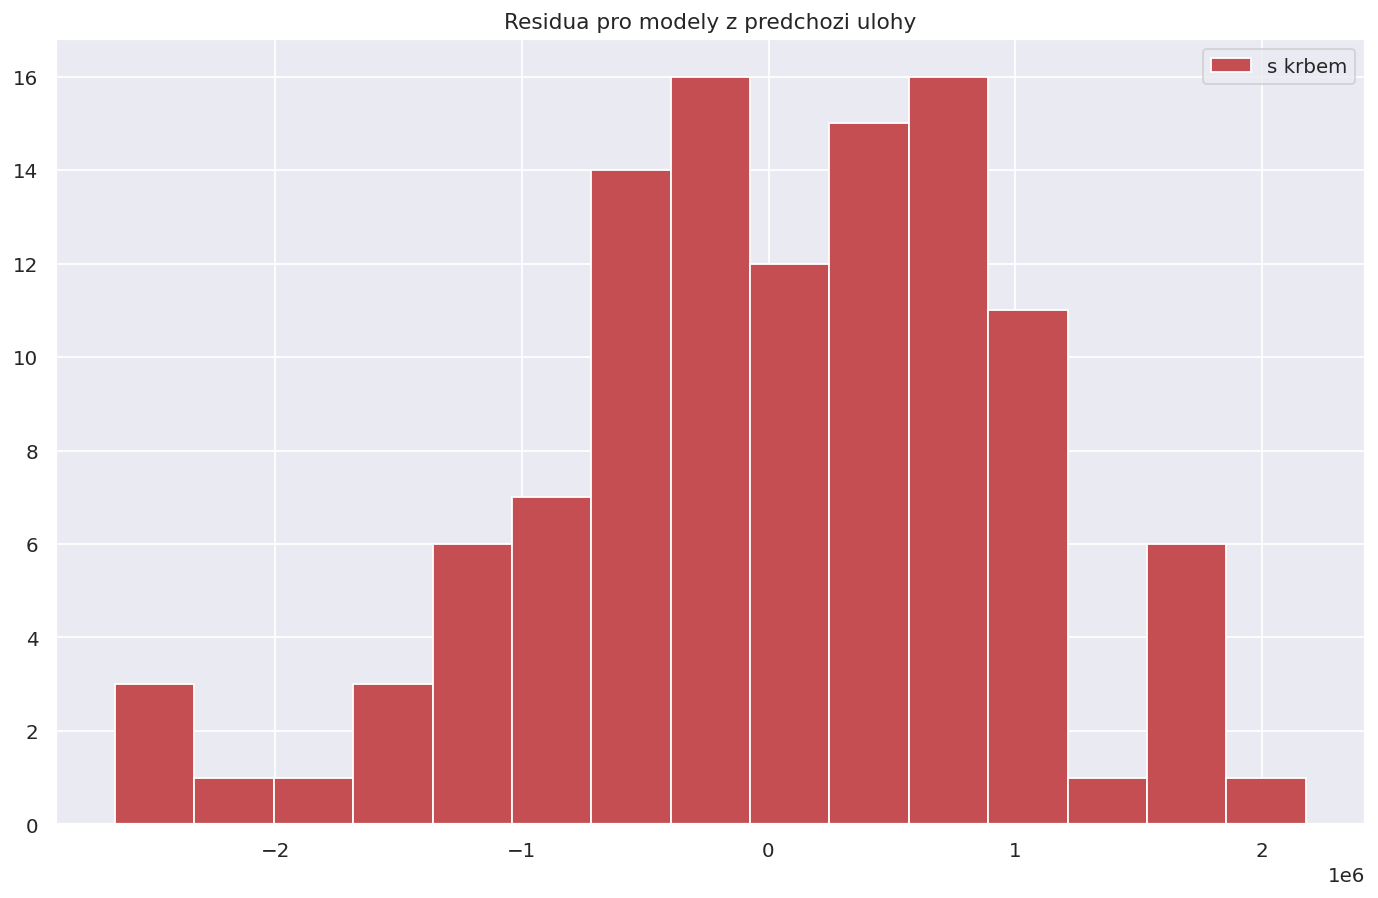

In [95]:
# histogramy rezidui a gaussovky pres ne
x = np.linspace(-4, 4+1, 10000)

#sbn.histplot(x = resid_s_krbem, bins = 15, color = 'r', label = "s krbem")
plt.hist(x = resid_s_krbem, bins = 15, color = 'r', label = "s krbem")
plt.plot(x, gauss(x= x, mi = 0, sigma2= np.var(resid_s_krbem)), 'b')
#sbn.histplot(x = resid_bez_krbu, bins = 15, color = 'g', label = "bez krbu")
plt.title("Residua pro modely z predchozi ulohy")
plt.legend(loc="upper right")
plt.show()

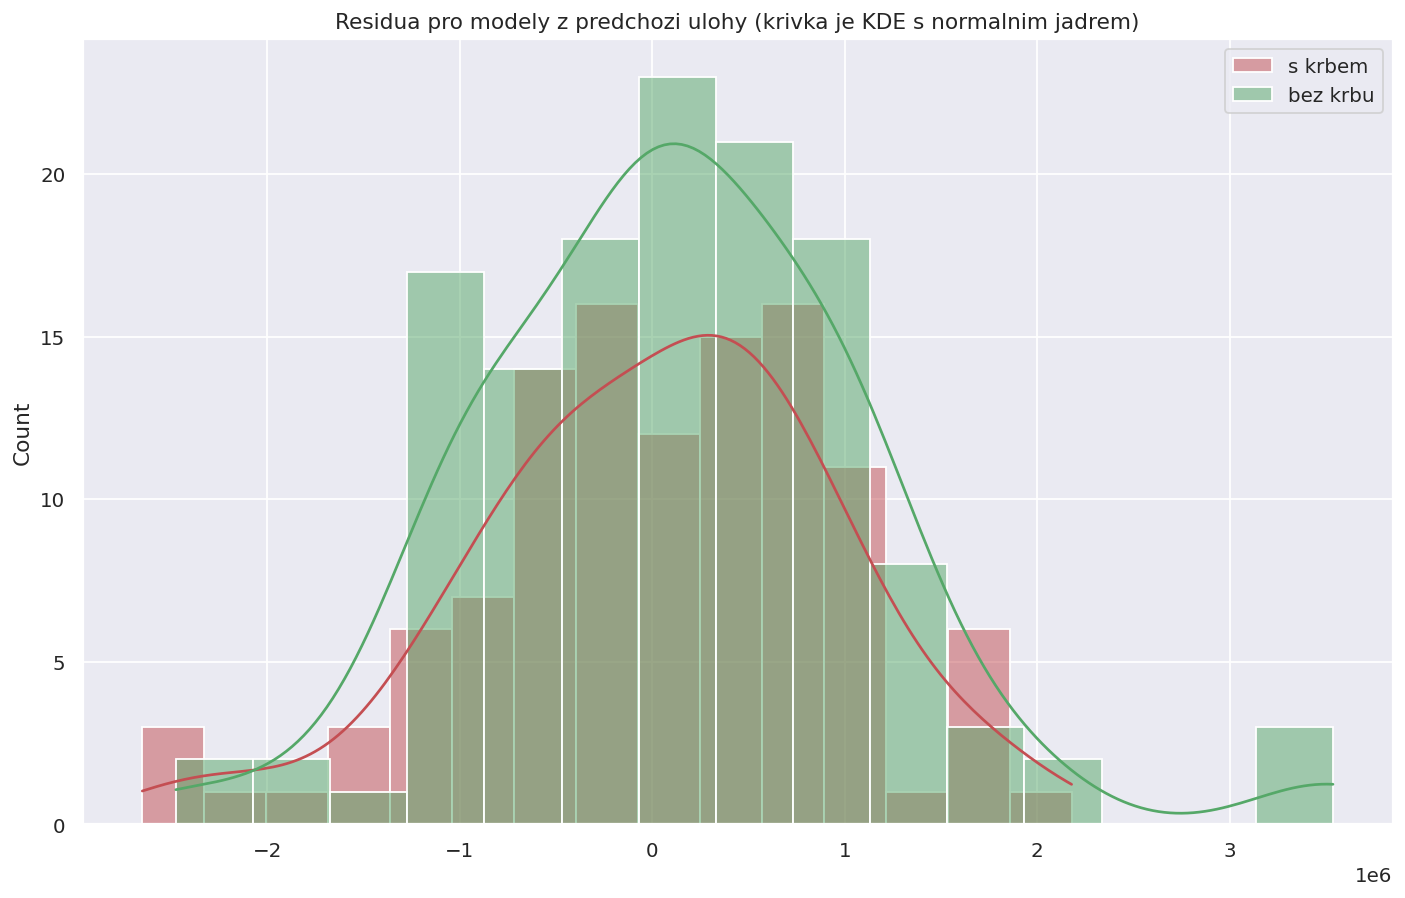

In [87]:
# histogramy rezidui S KDE (MIMO ZADANI)

sbn.histplot(x = resid_s_krbem, bins = 15, color = 'r', kde=True, label = "s krbem")
sbn.histplot(x = resid_bez_krbu, bins = 15, color = 'g', kde=True, label = "bez krbu")
plt.title("Residua pro modely z predchozi ulohy (krivka je KDE s normalnim jadrem)")
plt.legend(loc="upper right")
plt.show()

# KONEC UKOLU.

AttributeError: ignored

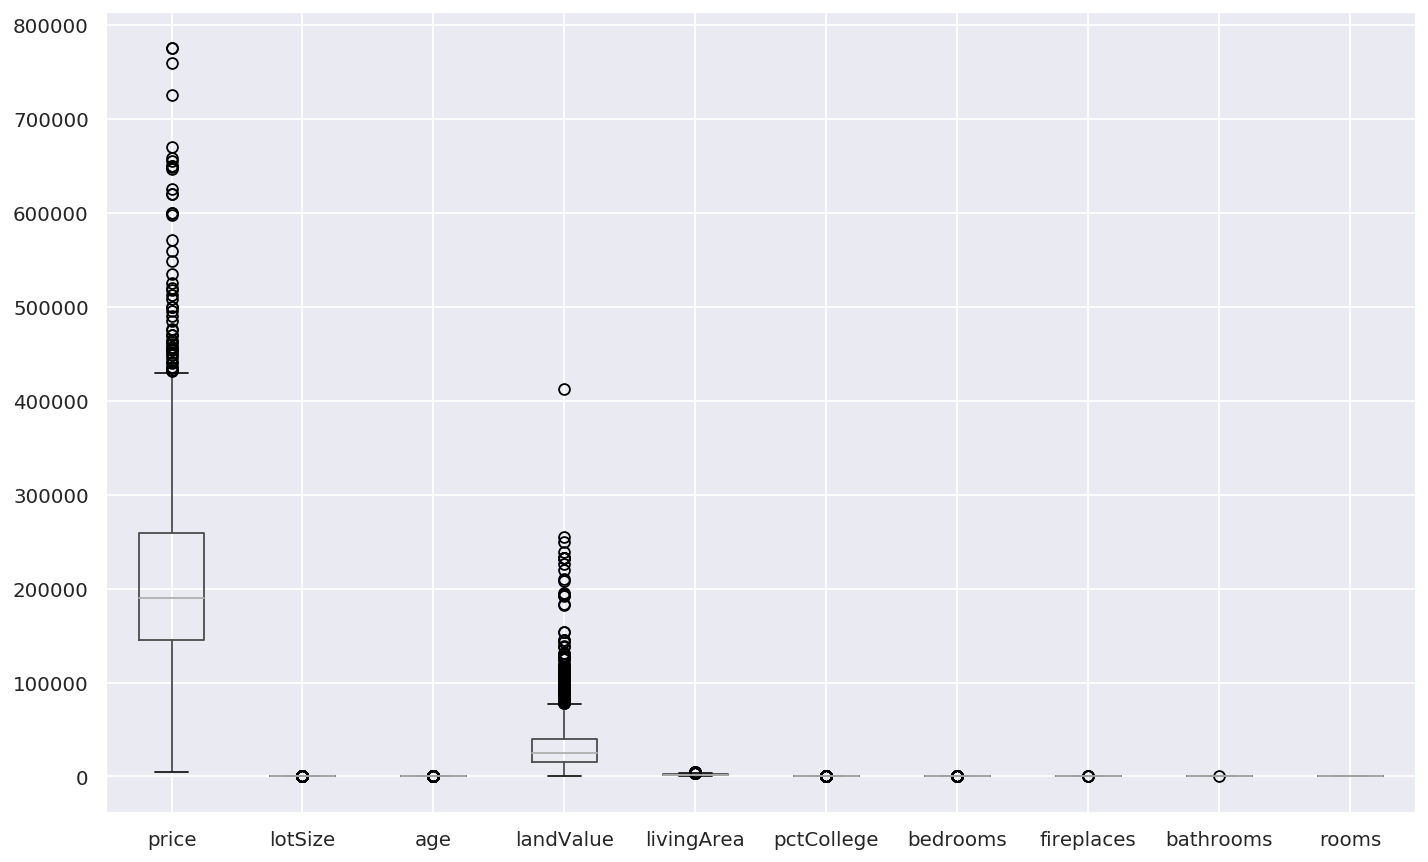

In [ ]:
pltbox = data.boxplot()
pltbox.show()

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(np.array([1,2,3]), np.array([1,2,3]),'r*')
plt.plot(np.array([2,2,3]), np.array([3,2,1]),'g*')
plt.title('test plot')
plt.grid()
plt.show()

In [ ]:
np.linspace(1,20000,9000)   # returns np.array starting with 1 ending with 2 and with 900 values in between
a = np.linspace(1,20000,9000)
b = np.linspace(2,20000,90000)
c = np.linspace(3,20000,90000)
d = np.linspace(4,20000,90000)
f = np.random.normal(0,1,100000000)
#ff = np.random.normal(0,1,100000000)
#fff = np.random.normal(0,1,100000000)
#ffff = np.random.normal(0,1,100000000)
#fffff = np.random.normal(0,1,100000000)
e = np.random.normal(0,1,100000000)
#print(e)
plt.hist(e, 1000)

In [ ]:
workspace = dir()
print(workspace)

In [ ]:
_i

In [ ]:
whos

# backups of old code - PROCEED WITH CAUTION

In [ ]:
ax = pd.cut(data_cz['pocet_pokoju'], bins = 3, retbins=True)

npax = np.asarray(ax)
from pprint import pprint
pprint(npax)
npax.__name__
print("\n\n\n")
print(npax)
print(type(npax))

In [ ]:
# pokus 3
ax = pd.cut(data_cz['pocet_pokoju'], bins = 3)
print(ax)
print(type(ax))
# pd.to_numeric(data.agebin, errors='coerce')
ax = 


In [ ]:
# jak v Pythonu faktorizovat "spojite" veliciny:
#   https://benalexkeen.com/bucketing-continuous-variables-in-pandas/
print("data_cz_faktorization = \n")
print(data_cz_factorization)
print("\n\n\n")
#pd.cut(data_cz['cena'], 6)
faktorizace_podle_poctu_pokoju = pd.cut(data_cz['pocet_pokoju'], bins = 3, retbins=True) 


#faktorizace_podle_poctu_pokoju = pd.cut(data_cz['pocet_pokoju'], bins = 3, labels=["1","2","3"]) 
print(faktorizace_podle_poctu_pokoju)
print(type(faktorizace_podle_poctu_pokoju))
#print(faktorizace_podle_poctu_pokoju.to_numpy())
#faktorizace_podle_poctu_pokoju.loc['']
data_cz_factorization['pocet_pokoju'] = pd.cut(data_cz['pocet_pokoju'], faktorizace_podle_poctu_pokoju)
# df['chi'] = pd.cut(df['chi'], custom_bucket_array)
print(data_cz_factorization)

In [ ]:
ax = pd.cut(data_cz['pocet_pokoju'], bins = 3)
ax_list = list(ax)
print(ax_list)
print(type(ax_list))
ax_np = np.asarray(ax_list)
print(ax_np)
print(type(ax_np))



In [ ]:
b = pd.Categorical(ax_np)
print(b)

b_df = pd.DataFrame(b)
b_df.columns = ['intervalky']
print(b_df)
data_cz_factorization['pocet_koupelen_faktor'] = b_df['intervalky']

data_cz_factorization['pocet_koupelen_faktor']  = data_cz_factorization['pocet_koupelen_faktor'].apply(lambda x: pd.factorize(x)[0])
print(data_cz_factorization['pocet_koupelen_faktor'])
data_cz_factorization.pocet_koupelen_faktor = pd.to_numeric(data_cz_factorization.pocet_koupelen_faktor, errors='coerce')
print(data_cz_factorization['pocet_koupelen_faktor'])
az = data_cz_factorization['pocet_koupelen_faktor']
#np.sum(data_cz_factorization['pocet_koupelen_faktor'])
#["malo_pokoju", "dost_pokoju", "hodne_pokoju"]

In [ ]:
print(curr_data.krb)
sbn.histplot(curr_data.krb, kde=True)

In [ ]:
### BACKUP - stary zpusob faktorizace

# prevod poctu koupelen a poctu pokoju na faktorovou promennou

# navod:
#factorize conf and team columns only
#df[['conf', 'team']] = df[['conf', 'team']].apply(lambda x: pd.factorize(x)[0])

data_cz_factorization = pd.DataFrame()

data_cz_factorization['cena'] = data_cz.cena
data_cz_factorization['plocha_pozemku'] = data_cz.plocha_pozemku
data_cz_factorization['plocha_obytna'] = data_cz.plocha_obytna
data_cz_factorization['stari_domu'] = data_cz.stari_domu
#data_cz_factorization[['pocet_koupelen', 'pocet_pokoju']] = data_cz[['pocet_koupelen', 'pocet_pokoju']].apply(lambda x: pd.factorize(x)[0])
# v radku vyse je faktorizace, ktera si bere tolik 'kategorii', kolik je treba (tj. tolik, kolik je ruznych moznych hodnot)
#nize se prepise jinym zpusobem faktorizace, ktery uz bude odpovidat zadani ukolu.
data_cz_factorization['krb'] = data_cz.krb

print(data_cz_factorization)



In [ ]:
# pomocne: jak cyklit pres nazvy sloupcu v dataframech
for column in curr_data:
    columnSeriesObj = curr_data[column]
    print('Column Name : ', column)
    print('Column Contents : ', columnSeriesObj.values)

(-1.1, 1.1, -0.05415292496331121, 2.145847075036689)

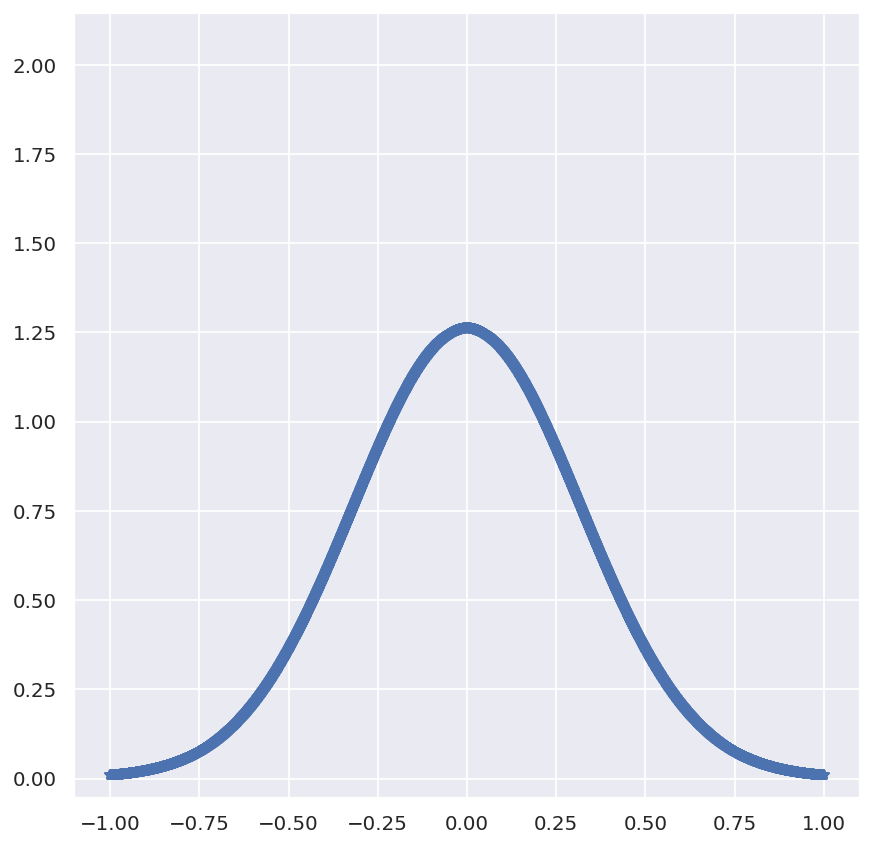

In [111]:
x = np.linspace(-1, 0+1, 10000)
plt.plot(x, gauss(x= x, mi = 0, sigma2= 0.1), 'b*')
plt.axis('square')